---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The United States is the second largest producer of avocados after Mexico. About 90% of avocado production in the United States takes place in California by more than 5,000 growers. The average grove size in California is about 13 acres. One avocado tree can produce from 200 to 500 avocados per year. About 400 million pounds of avocados are harvested each year in California alone. Florida and Hawaii produce most of the remaining 10% of avocados produced in the United States. 
    
    The primary objective of this project is to analyze the patterns, trends, and factors influencing Avocado prices in USA. 
    
    The analysis will cover key aspects such as Average prices, Total volumes between 2015 and 2023.For our analysis of Average prices across USA, we will employ statistical techniques in section 5 Explority Data Analysis (EDA). 
    
    The notebook is structured to guide readers through a comprehensive data analysis project. It begins with a Project Overview, which includes an Introduction outlining the context and a Problem Statement to define the issue at hand, followed by the Objectives of the analysis. Next, the Importing Packages section lists the necessary libraries. Loading Data details the process of importing datasets. Data Cleaning addresses how the data is prepared for analysis. The Exploratory Data Analysis (EDA) section provides insights into the data through visualizations.
    
    Through this project, we hope to provide a detailed understanding of the current state of Avocado prices in USA, identify challenges and opportunities, and propose actionable recommendations to enhance the efficiency and sustainability of Avocado market. Ultimately, our oal is to support the development of a more resilient and prosperous Avocado market in USA.


---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [1]:
#importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import csv
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

## The dataset

For this Project, we make use of the `Crop Prices` dataset.

The following are the descriptions of the columns in our dataset: 

* `Date`: Last day of the week.
* `AveragePrice`: Average Selling price.
* `TotalVolume`: Total Volume by weight in pounds.
* `plu4046`: small/medium Hass Avocados (~3-5 oz).
* `plu4225`: large Hass Avocados (~8-10 oz).
* `plu4770`: extra large Hass Avocados (~10-15 oz).
* `TotalBags`: the bags indicate a pre-packaged container consisting of a variable number of avocados of mixed PLU type
* `SmallBags`: Small bags consisting of a variable number of avocados.
* `LargeBags`: Large bags consisting of a variable number of avocados.
* `XLargeBags`: Extra large bags consiting of a variable number of avocados.
* `type`: types of avocado .
* `Region`: Region where avocados are sold.

## Source of data  
 * kaggle/input/avocado-prices-and-sales-volume-2015-2023/Avocado_HassAvocadoBoard_20152023

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [27]:
# loading dataset
df = pd.read_csv("Avocado_HassAvocadoBoard_20152023v1.0.1.csv", index_col=False)
df.head() 

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


**Data Overview:**

**Period:** The data covers the period of January 1st to April 4th, 2015 (2015-01-04).
**Variables:** The dataset includes information on:
**Average Price:** The average price of avocados.
**Total Volume:** The total volume of avocados sold.
**PLU Codes (4046, 4225, 4770):** These represent different sizes or types of avocados (e.g., small, large, and extra-large).
**Total Bags:** The total number of bags of avocados sold.
Small Bags, Large Bags, XLarge Bags: The breakdown of bag sizes sold.
**Type:** Indicates whether the avocados are "conventional" or "organic."
Descriptive Insights:

**Volume Variation:**  There's significant variation in the "Total Volume" of avocados sold.  The highest volume occurred on 2015-01-04 (788,025.06), while the lowest was also on 2015-01-04 (1,373.95). This suggests that the date alone isn't the sole driver of volume.

**Price Fluctuation:** The "Average Price" also varies.  The highest average price is 1.79 (organic) and the lowest is 1.00 (conventional), both on 2015-01-04.  This indicates that price is likely influenced by factors like avocado type and potentially the volume sold.

**PLU Code Distribution:**  The PLU codes show different volume patterns.  For instance, PLU 4046 has the highest volume for conventional avocados, while PLU 4770 has a much lower volume. This could reflect consumer preferences or availability of different avocado sizes/types.

**Bag Size Preferences:**  "Small Bags" consistently have the highest count compared to "Large Bags" and "XLarge Bags" across both conventional and organic avocados. This suggests a preference for smaller bag sizes among consumers. Notably, "XLarge Bags" show zero sales in the provided data.

**Organic vs. Conventional:**  The data clearly distinguishes between "organic" and "conventional" avocados.  Generally, organic avocados have a higher average price compared to conventional avocados. However, the volume of organic avocados sold is significantly lower.

**Potential Further Analysis:**

**Correlations:** It would be interesting to explore correlations between variables. For example, is there a relationship between "Average Price" and "Total Volume"? Does the volume of specific PLU codes correlate with bag size preferences?
**Time Series Analysis:** Analyzing the trends over a longer time period (beyond the single date provided) would reveal more about seasonality and potential price fluctuations.
**Regression Analysis:** Building a regression model could help understand how different factors (PLU codes, type, volume) influence the "Average Price."

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [28]:
# Print the first few rows 
print("First few rows of the dataset:")
print(df.head())

# Print the summary statistics 
print("\nSummary statistics of the dataset:")
print(df.describe())

# Check for missing values 
print("\nMissing values in the dataset:")
print(df.isnull().sum())

First few rows of the dataset:
         Date  AveragePrice  TotalVolume    plu4046    plu4225   plu4770  \
0  2015-01-04          1.22     40873.28    2819.50   28287.42     49.90   
1  2015-01-04          1.79      1373.95      57.42     153.88      0.00   
2  2015-01-04          1.00    435021.49  364302.39   23821.16     82.15   
3  2015-01-04          1.76      3846.69    1500.15     938.35      0.00   
4  2015-01-04          1.08    788025.06   53987.31  552906.04  39995.03   

   TotalBags  SmallBags  LargeBags  XLargeBags          type  \
0    9716.46    9186.93     529.53         0.0  conventional   
1    1162.65    1162.65       0.00         0.0       organic   
2   46815.79   16707.15   30108.64         0.0  conventional   
3    1408.19    1071.35     336.84         0.0       organic   
4  141136.68  137146.07    3990.61         0.0  conventional   

                region  
0               Albany  
1               Albany  
2              Atlanta  
3              Atlanta  
4 

In [29]:
df.shape

(53415, 12)

In [30]:
print(f'Name of Columns is: \n {df.columns}')

Name of Columns is: 
 Index(['Date', 'AveragePrice', 'TotalVolume', 'plu4046', 'plu4225', 'plu4770',
       'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'region'],
      dtype='object')


In [31]:
df.columns = df.columns.str.capitalize()
df.head()

,Date,Averageprice,Totalvolume,Plu4046,Plu4225,Plu4770,Totalbags,Smallbags,Largebags,Xlargebags,Type,Region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


In [32]:
# Checking duplicate row

print(f'Is there duplicated rows in the columns?\n{df.duplicated().any()}')

Is there duplicated rows in the columns?
False


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   Averageprice  53415 non-null  float64
 2   Totalvolume   53415 non-null  float64
 3   Plu4046       53415 non-null  float64
 4   Plu4225       53415 non-null  float64
 5   Plu4770       53415 non-null  float64
 6   Totalbags     53415 non-null  float64
 7   Smallbags     41025 non-null  float64
 8   Largebags     41025 non-null  float64
 9   Xlargebags    41025 non-null  float64
 10  Type          53415 non-null  object 
 11  Region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.9+ MB


In [34]:
df['Date'] = pd.to_datetime(df['Date'])

In [35]:
df['Date'].dtype

dtype('<M8[ns]')

In [36]:

df['Year'] =df['Date'].dt.year

In [37]:
df.head()

,Date,Averageprice,Totalvolume,Plu4046,Plu4225,Plu4770,Totalbags,Smallbags,Largebags,Xlargebags,Type,Region,Year
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany,2015
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany,2015
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta,2015
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta,2015
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington,2015


In [38]:
# Fill missing Smallbags 
df['Smallbags'] = df['Smallbags'].fillna(df['Smallbags'].median())
    
# Fill missing LargeBags 
df['Largebags'] = df['Largebags'].fillna(df['Largebags'].mean())
    
# Fill missing XLargeBags 
df['Xlargebags'] = df['Xlargebags'].fillna(df['Xlargebags'].mean())

In [39]:
print(f'Number of missing data in each column is : \n{df.isna().sum()}')

Number of missing data in each column is : 
Date            0
Averageprice    0
Totalvolume     0
Plu4046         0
Plu4225         0
Plu4770         0
Totalbags       0
Smallbags       0
Largebags       0
Xlargebags      0
Type            0
Region          0
Year            0
dtype: int64


In [40]:
df.head()

,Date,Averageprice,Totalvolume,Plu4046,Plu4225,Plu4770,Totalbags,Smallbags,Largebags,Xlargebags,Type,Region,Year
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany,2015
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany,2015
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta,2015
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta,2015
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington,2015


In [41]:
df.to_csv('Avocado_Dataset_clean.csv')

In [42]:
round(df.describe().T,3)

,count,mean,min,25%,50%,75%,max,std
Date,53415,2019-07-21 08:27:50.901432320,2015-01-04 00:00:00,2017-05-14 00:00:00,2019-08-04 00:00:00,2021-10-03 00:00:00,2023-12-03 00:00:00,NaN
Averageprice,53415.0,1.42891,0.44,1.119091,1.4,1.69,3.44083,0.393116
Totalvolume,53415.0,869447.441374,84.56,16264.655,120352.46,454238.015,61034457.1,3545273.998345
Plu4046,53415.0,298270.749448,0.0,694.725,14580.58,128792.38,25447201.87,1307669.329406
Plu4225,53415.0,222217.037654,0.0,2120.8,17516.63,93515.6,20470572.61,955462.406892
Plu4770,53415.0,20531.954686,0.0,0.0,90.05,3599.735,2860025.19,104097.691562
Totalbags,53415.0,217508.289491,0.0,7846.52,36953.1,111014.61,16298296.29,867694.737352
Smallbags,53415.0,79977.775872,0.0,0.0,694.58,15791.695,12567155.58,500786.687795
Largebags,53415.0,23313.164066,0.0,0.0,505.47,23313.164066,4324231.19,131160.693617
Xlargebags,53415.0,2731.811796,0.0,0.0,0.0,2731.811796,679586.8,19796.586439


In [43]:

obj_data = df.select_dtypes(include='object')
obj_data.describe()

,Type,Region
count,53415,53415
unique,2,60
top,conventional,Albany
freq,26709,932


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [102]:
title_type = df.groupby('Type')[['Averageprice','Totalbags','Totalvolume']].sum() 
print(title_type)

              Averageprice     Totalbags   Totalvolume
Type                                                  
conventional  31217.091789  1.066761e+10  4.468436e+10
organic       45108.146988  9.505959e+08  1.757176e+09


**Price Comparison:**

The average price of organic produce (45,108.15) is significantly higher compared to conventional produce (31,217.09).

**Bag Comparison:**

Total bags sold for conventional produce are vastly higher (approximately 10.67 billion) than those for organic produce (approximately 950.60 million).

**Volume Comparison:**

The total volume of conventional produce sold (44.68 billion) far exceeds the total volume of organic produce sold (1.76 billion).

This indicates a higher demand and volume for conventional produce, despite the higher prices of organic options. This could be due to various factors such as consumer preferences, availability, or price sensitivity.

In [103]:
Avocado_Types = title_type.Averageprice.sort_values().index 
prices = title_type.Averageprice.sort_values() 

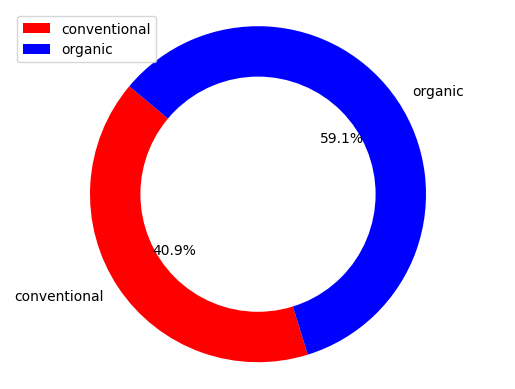

In [104]:
# Plot a pie chart.
# The `autopct` argument defines the format applied to the data labels. 
# The `startangle` argument determines which point in the pie to start plotting proportions from. 
colors = ['#FF0000', '#0000FF'] 
plt.pie(prices,colors=colors, labels = Avocado_Types, autopct='%1.1f%%',  startangle=140)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
# Place the chart legend in a position which does not overlap with other components. 
plt.legend(loc="best")
plt.axis('equal')
plt.show()

**Dominance of Organic:** The most striking observation is the overwhelming dominance of the organic segment. The blue segment representing organic products occupies a significantly larger portion of the pie chart compared to the red segment for conventional products. This suggests that the store or market from which this data was collected sells substantially more organic products than conventional ones.

**Quantifiable Proportions:** The graph provides precise percentages:

**Organic:** 59.1%
**Conventional:** 40.9%

This means that for every 100 units (or weight) of the product sold, approximately 59 are organic, and 41 are conventional.

**Possible Interpretations and Implications:**

**Consumer Preference:** This skewed distribution likely reflects a strong consumer preference for organic options in this particular market. Factors driving this could include perceived health benefits, environmental concerns, or taste preferences.

**Market Positioning:** The store might be strategically focusing on organic products to cater to a specific customer segment or to differentiate itself from competitors.

**Pricing Strategy:** Organic products typically command higher prices. The higher sales volume in the organic segment could indicate a pricing strategy that emphasizes value or premium offerings.

**Sourcing and Availability:** The availability and sourcing of organic products might be more robust, allowing for higher sales volumes.

**Potential for Growth:** While organic sales are dominant, the conventional segment still holds a significant market share (40.9%). This suggests that there's still a sizable consumer base for conventional products, and there might be opportunities to further explore this segment.

**Further Analysis and Considerations:**

**Comparison with Overall Market:** It would be interesting to compare these proportions with the overall market share of organic vs. conventional products in the broader region or industry. This would provide context for whether this store's distribution is typical or unique.

**Trends Over Time:** Analyzing how these proportions have changed over time (e.g., year-over-year) would reveal insights into evolving consumer preferences and market dynamics.

**Demographic Data:** Understanding the demographics of customers who purchase organic vs. conventional products could help tailor marketing efforts and product offerings.

**Product Category Specifics:** While we assume this represents avocados based on prior context, confirming the specific product category would provide more focused insights.

In [105]:
title_Year = df.groupby('Year')[['Averageprice','Totalbags','Totalvolume']].sum() 
print(title_Year)

      Averageprice     Totalbags   Totalvolume
Year                                          
2015   7723.940000  7.721922e+08  4.385469e+09
2016   7517.800000  1.463159e+09  4.820890e+09
2017   8669.560000  1.646289e+09  4.934306e+09
2018   8814.501742  8.701278e+08  4.939448e+09
2019   9347.670886  9.594523e+08  4.977871e+09
2020   8544.986049  1.391984e+09  6.019683e+09
2021   8462.372024  1.646591e+09  5.755039e+09
2022   9477.179838  1.527338e+09  5.291130e+09
2023   7767.228238  1.341073e+09  5.317699e+09


**Average Price Fluctuation:** The "AveragePrice" shows significant volatility over the years. While there's no consistent upward or downward trend, we see peaks in 2015, 2019, and 2022, and troughs in 2016 and 2023. This suggests that market forces, seasonality, and potentially external factors (like weather or economic conditions) are impacting pricing.

**Total Bags Sold:** "Totalbags" exhibits considerable variation as well. There's a general trend of increasing bag sales from 2016 to 2017 and again in 2020 and 2021. However, there are significant drops in 2018 and a decline observed from 2021 to 2023. This could reflect changes in consumer purchasing habits, market saturation, or even changes in data collection methodology.

**Total Volume Sold:** "Totalvolume" demonstrates more stability than the other two metrics. While there are fluctuations, the overall volume stays within a narrower range compared to "AveragePrice" and "Totalbags." This suggests that while price and the number of bags sold may vary, the total amount of product sold is relatively consistent. Notably, there is a significant jump in volume in 2020, which is maintained in 2021, but decreases in 2022 and 2023.

**Potential Relationships and Questions:**

**Price Elasticity:** It would be interesting to analyze the relationship between "AveragePrice" and "Totalbags" or "Totalvolume." Does a higher price lead to fewer bags or lower volume sold (indicating price sensitivity)?

**External Factors:** What external factors could be influencing these trends? Consider things like:
Economic conditions (recessions, inflation)
Weather patterns (droughts, frost) affecting avocado production
Changes in consumer preferences (e.g., shifts towards organic or different types of avocados)
Supply chain disruptions

**Data Consistency:** Is the data collection methodology consistent across all years? Changes in how data is collected could explain some of the fluctuations.

**2020 Anomaly:** The year 2020 stands out with a significant jump in "Totalvolume." Was this related to the COVID-19 pandemic (e.g., changes in consumer spending or supply chains)? Further investigation is needed to understand this anomaly.

**Further Analysis:**

**Correlation Analysis:** Calculate correlation coefficients between the variables to quantify the strength and direction of their linear relationships.
**Regression Analysis:** Develop a regression model to predict "Totalvolume" or "AveragePrice" based on other variables and potentially external factors.
**Time Series Decomposition:** Decompose the time series data to identify trends, seasonality, and cyclical patterns.

In [106]:
Sale_Year = title_Year.Averageprice.sort_values().index 
Averprices = title_Year.Averageprice.sort_values() 

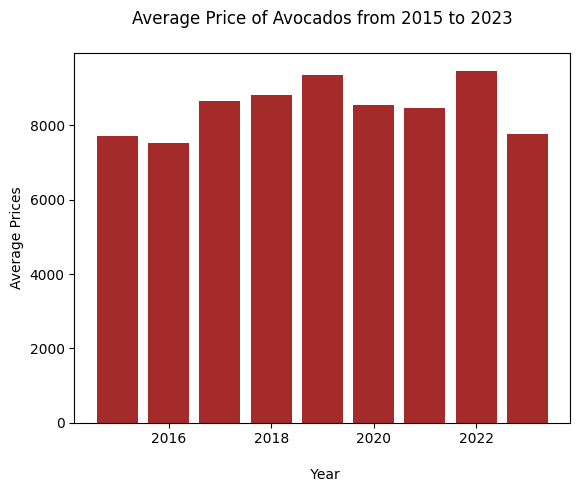

In [107]:
# Plot total bill (y-axis) per day of the week (x-axis). 
# We only have to call a single line of code from matplotlib to produce the base graph. 
# We set the x-axis, y-axis, and the colour of the bars.
plt.bar(Sale_Year, Averprices, color= 'Brown')

# Set x and y-axis titles.
plt.ylabel('Average Prices')
plt.xlabel('\n Year') # Note: '\n' creates a newline (try removing it and see what happens)  

# Set graph title.
plt.title('Average Price of Avocados from 2015 to 2023\n')

# Show graph.
plt.show()

**Visual Observations & Immediate Insights:**

**Fluctuating Prices:** The most prominent feature is the clear fluctuation in average avocado prices over the years. This immediately suggests that the avocado market isn't stable and is subject to various influencing factors.

**Peak Prices:** We can visually identify peaks in average prices. It appears that 2015, 2019, and 2022 exhibit relatively higher average prices compared to other years.

**Low Points:** Conversely, years like 2016 and 2023 seem to have experienced lower average prices.

**General Volatility:** The chart underscores the overall volatility in avocado prices. This implies a dynamic market influenced by factors that change significantly over time.

**Deeper Analysis & Potential Inferences:**

**Supply and Demand Dynamics:** Fluctuations in price often reflect the interplay of supply and demand. Reduced supply (perhaps due to weather events, disease, or reduced production area) can drive prices up, while an oversupply might lead to price decreases. Demand shifts (changing consumer preferences, seasonality) also play a role.
**External Factors:** Several external factors could be contributing to the price changes:

**Weather Conditions:** Droughts, frosts, or excessive rainfall in avocado-growing regions can drastically impact harvests and thus prices.

**Economic Conditions:** Economic recessions or booms can influence consumer spending and demand for "luxury" items like avocados, impacting prices.

**Transportation Costs:** Changes in fuel prices or logistical issues can affect the cost of getting avocados to market, influencing the final price.

**Global Trade Policies:** Tariffs, trade agreements, and import/export regulations can all have a significant impact on avocado prices, especially if a country relies heavily on imports.

**Technological Advances:** Improvements in farming practices, storage, and transportation could potentially lead to increased supply and potentially lower prices over the long term.

**Cycles and Trends:** While not immediately clear, there might be underlying cyclical patterns in the price fluctuations. Analyzing the data with time series analysis techniques could reveal such patterns.

**2020 Anomaly:** While not as pronounced as in the volume data you shared earlier, it's worth noting that 2020 doesn't stand out as a particularly high or low price year. This suggests that the factors affecting volume in 2020 might not have directly translated to dramatic price changes.

**Further Investigations:**

**Correlation Analysis:** Compare this price data with data on production volume, import/export quantities, and other relevant economic indicators to identify potential correlations.

**Time Series Analysis:** Use techniques like moving averages, decomposition, or spectral analysis to understand trends, seasonality, and cyclical patterns in the price data.
Regression Modeling: Build a statistical model to predict avocado prices based on historical data and other relevant predictor variables.

**Qualitative Research:** Supplement the quantitative analysis with qualitative research, like news articles, industry reports, and expert interviews, to gain a deeper understanding of the factors driving price fluctuations

In [108]:
df1 = df.copy(deep = True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace = True)
df1 = df1.resample('W').sum()
df1.head()

,Averageprice,Totalvolume,Plu4046,Plu4225,Plu4770,Totalbags,Smallbags,Largebags,Xlargebags,Type,Region,Year
Date,,,,,,,,,,,,
2015-01-04,140.54,8.467434e+07,33098258.74,36851038.43,2278818.64,12446221.39,9910008.90,2485655.90,50556.59,conventionalorganicconventionalorganicconventi...,AlbanyAlbanyAtlantaAtlantaBaltimoreWashingtonB...,217620
2015-01-11,148.03,7.855581e+07,31024164.99,32808429.84,2349167.45,12374044.96,10352936.42,1977832.00,43276.54,conventionalorganicconventionalorganicconventi...,AlbanyAlbanyAtlantaAtlantaBaltimoreWashingtonB...,217620
2015-01-18,150.24,7.838878e+07,31802706.86,31662041.93,2208250.55,12715784.74,10548854.11,2145586.13,21344.50,conventionalorganicconventionalorganicconventi...,AlbanyAlbanyAtlantaAtlantaBaltimoreWashingtonB...,217620
2015-01-25,150.89,7.646628e+07,32305132.87,28929122.37,2078378.86,13153646.97,10877316.95,2252815.92,23514.10,conventionalorganicconventionalorganicconventi...,AlbanyAlbanyAtlantaAtlantaBaltimoreWashingtonB...,217620
2015-02-01,134.68,1.194532e+08,50292988.96,50696230.48,3687489.31,14776526.50,11576833.65,3073989.39,125703.46,conventionalorganicconventionalorganicconventi...,AlbanyAlbanyAtlantaAtlantaBaltimoreWashingtonB...,217620


C:\Users\Kaytee\AppData\Local\Temp\ipykernel_10716\611641666.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Averageprice']);
C:\Users\Kaytee\AppData\Local\Temp\ipykernel_10716\611641666.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Averageprice']);
C:\Users\Kaytee\AppData\Loc

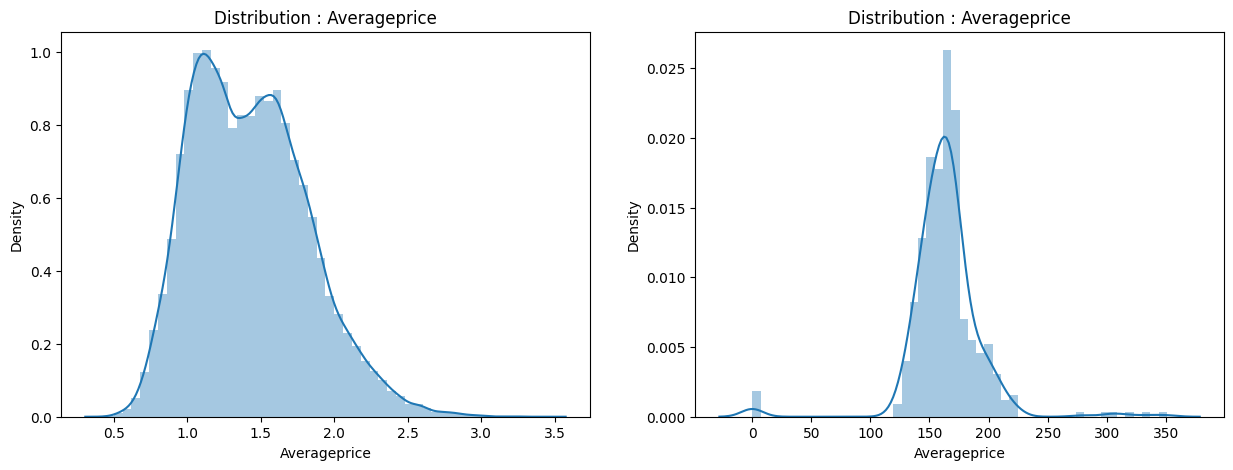

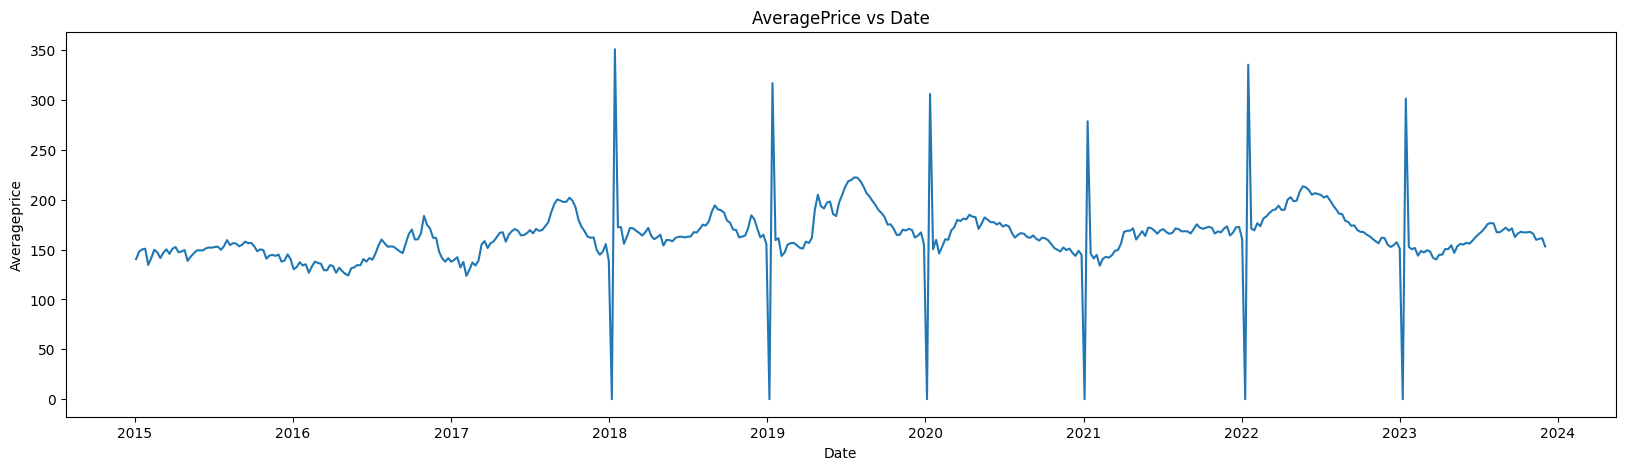

In [109]:
color1 = ['#296C92','#3EB489']
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))

plt.subplot(1,2,1)
sns.distplot(df['Averageprice']);
plt.title('Distribution : Averageprice')

plt.subplot(1,2,2)
sns.distplot(df1['Averageprice']);
plt.title('Distribution : Averageprice')

fig,ax = plt.subplots(nrows = 1, ncols = 1,figsize = (20,5))
plt.subplot(1,1,1)
sns.lineplot(x = df1.index ,y = 'Averageprice',data = df1,palette = color1);
plt.title('AveragePrice vs Date')

plt.show()
fig.tight_layout(pad = 2)

**Distribution Analysis (Top Two Charts):**

**Bimodal Distribution:** The first chart clearly shows a bimodal distribution of "Averageprice." This means there are two distinct peaks in the data, suggesting two predominant price ranges that avocados tend to fall into. This could be due to several factors:

**Different Avocado Varieties:** Different types of avocados (e.g., Hass, Fuerte) may have different price points.

**Quality Grades:** Variations in quality (size, ripeness, appearance) lead to different prices.
Seasonal Effects: Prices might be higher during certain seasons when avocados are less available.
**Market Segmentation:** Organic avocados or those from specific regions might command premium prices, creating distinct price clusters.

**Skewness:** Both distributions exhibit some degree of skewness. The first one is slightly right-skewed, indicating a tail of higher prices. The second distribution seems more symmetrical but still shows signs of slight skew. This suggests that while there are typical price ranges, there are also instances of unusually high prices that deviate from the norm.

**Concentrated Price Points:** The second chart, with a zoomed-in x-axis, reveals that a large proportion of avocados are concentrated around a specific price point (around 150-200, whatever unit this represents). This suggests a common or standard price for a significant segment of the avocado market.

**Time Series Analysis (Bottom Chart):**

**Volatility and Spikes:** The time series plot clearly demonstrates the volatility of "Averageprice" over time. We see frequent and sharp spikes, indicating significant price fluctuations. These spikes could be related to:

**Short-term Supply Shocks:** Sudden weather events, transportation disruptions, or pest outbreaks can quickly impact supply and drive prices up.

**Demand Surges:** Promotional campaigns, changes in consumer preferences, or seasonal demand increases can lead to rapid price adjustments.

**Seasonality (Potential):** While not definitively clear, there might be some seasonal patterns in the price fluctuations. For example, if spikes tend to occur around the same time each year, it would suggest a seasonal influence. Further analysis with time series decomposition techniques would be needed to confirm this.

**No Clear Trend:** Visually, there doesn't appear to be a strong upward or downward trend in "Averageprice" over the entire period. This suggests that while there are short-term fluctuations, the average price tends to revert to a mean or range over the long term.

**Impact of External Events:** The chart highlights specific dates with significant price spikes. It would be highly valuable to investigate what events or factors might have caused these spikes. Correlating these dates with news articles, weather data, or market reports could provide valuable insights.

**Deeper Insights and Questions:**

**Drivers of Bimodal Distribution:** What are the specific factors contributing to the two distinct price peaks observed in the distribution charts? Is it variety, quality, seasonality, or a combination of factors?
**Predictability of Spikes:** Are the price spikes predictable? Can we identify leading indicators or patterns that precede these spikes, allowing for better forecasting and risk management?

**Relationship Between Distribution and Time Series:** How does the bimodal distribution relate to the price fluctuations over time? Do the spikes represent shifts between the two price modes, or are they independent events?

**Market Segmentation and Dynamics:** Can we segment the market based on "Averageprice" (e.g., premium vs. standard avocados) and analyze the price dynamics within each segment?

**Further Analysis:**

**Statistical Tests for Bimodality:** Apply statistical tests (e.g., dip test) to confirm the bimodality observed visually.
**Time Series Decomposition:** Decompose the time series data to identify trend, seasonality, and residual components.

**Correlation Analysis:** Correlate "Averageprice" with other potentially influencing variables (e.g., weather indices, economic indicators, supply data).
Regression Modeling: Build a model to predict "Averageprice" based on historical data and other relevant factors.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [111]:
%pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 435.7 kB/s eta 0:00:23
   ---------------------------------------- 0.0/9.9 MB 393.8 kB/s eta 0:00:25
   ---------------------------------------- 0.1/9.9 MB 438.9 kB/s eta 0:00:23
   ---------------------------------------- 0.1/9.9 MB 547.6 kB/s eta 0:00:18
    --------------------------------------- 0.2/9.9 MB 573.4 kB/s eta 0:00:17
    --------------------------------------- 0.2/9.9 MB 692.4 kB/s eta 0:00:14
    --------------------------------------- 0.2/9.9 MB 686.8 kB/s eta 0:00:15
   - -------------------------------------- 0.3/9.9 MB 655.4 kB/s eta 0:00:15
   - -------------------------------------- 0.3/9.9 MB 703.7 kB/s eta 0:00:14
   - -------------------------------------- 0.3/9.9 MB 677.0 kB/s eta 0:00:15
   -

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [113]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    
    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    return R2, adjusted_r2, CV_R2, RMSE
    
    print('RMSE:', round(RMSE,4))
    print('R2:', round(R2,4))
    print('Adjusted R2:', round(adjusted_r2, 4) )
    print("Cross Validated R2: ", round(cv_score.mean(),4) )

In [114]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

try:
    raw_df1 = pd.read_csv('../input/avocado-prices/avocado.csv')
except:
    raw_df1 = pd.read_csv('avocado.csv')

In [115]:
# Deleting column
raw_df1 = raw_df1.drop('Unnamed: 0', axis = 1)

In [116]:
numeric_columns = ['AveragePrice', 'Total Volume','4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
categorical_columns = ['Region', 'Type']
time_columns = ['Data', 'Year']
numeric_columns_boston = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [117]:
# Changing data types
for i in raw_df1.columns:
    if i == 'Date':
        raw_df1[i] = raw_df1[i].astype('datetime64[ns]')
    elif raw_df1[i].dtype == 'object':
        raw_df1[i] = raw_df1[i].astype('category')

In [119]:
df1 = raw_df1.copy()

df1['Date'] = pd.to_datetime(df1['Date'])
df1['month'] = df1['Date'].dt.month

df1['Spring'] = df1['month'].between(3,5,inclusive='both')
df1['Summer'] = df1['month'].between(6,8,inclusive='both')
df1['Fall'] = df1['month'].between(9,11,inclusive='both')
# df1['Winter'] = df1['month'].between(12,2,inclusive='both')

df1.Spring = df1.Spring.replace({True: 1, False: 0})
df1.Summer = df1.Summer.replace({True: 1, False: 0})
df1.Fall = df1.Fall.replace({True: 1, False: 0})

C:\Users\Kaytee\AppData\Local\Temp\ipykernel_10716\1349161550.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.Spring = df1.Spring.replace({True: 1, False: 0})
C:\Users\Kaytee\AppData\Local\Temp\ipykernel_10716\1349161550.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.Summer = df1.Summer.replace({True: 1, False: 0})
C:\Users\Kaytee\AppData\Local\Temp\ipykernel_10716\1349161550.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior,

In [120]:
# Encoding labels for 'type'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['type'] = le.fit_transform(df1['type'])

# Encoding 'region' (One Hot Encoding)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')
ohe = pd.get_dummies(data=df1, columns=['region'])

df1 = ohe.drop(['Date','4046','4225','4770','Small Bags','Large Bags','XLarge Bags'], axis=1)

In [123]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
                
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers:', df1.shape[0]+df2.shape[0])
    
    return multiple_outliers

In [124]:
numeric_columns2 = ['Total Volume', 'Total Bags']

Outliers_IQR = IQR_method(df1,1,numeric_columns2)
# dropping outliers
df1 = df1.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers: 2533


In [125]:
X = df1.drop('AveragePrice', axis=1)
y = df1['AveragePrice']

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [127]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [128]:
col_names = ['Total Volume', 'Total Bags']
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)


## *Simple Linear Regression Model*

In [135]:
from sklearn.linear_model import LinearRegression

# Creating and training model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

In [136]:
ndf = [Reg_Models_Evaluation_Metrics(lm,X_train,y_train,X_test,y_test,y_pred)]

lm_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
lm_score.insert(0, 'Model', 'Linear Regression')
lm_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Linear Regression,0.598794,0.593599,0.604283,0.255931


**Key Metrics and Their Interpretation:**

**R² Score (R-squared):** 0.598794

**Interpretation:** This indicates that the linear regression model explains approximately 59.88% of the variance in the dependent variable (the variable you're trying to predict). In other words, about 60% of the changes in the dependent variable can be explained by the independent variables included in the model.

**General Guideline** An R² of 1 represents a perfect fit, while 0 indicates no explanatory power. 0.5988 suggests a moderately good fit, but there's still a significant portion of the variance that the model doesn't capture.

**Adjusted R² Score:** 0.593599

**Interpretation:** The adjusted R² is a modified version of R² that takes into account the number of predictors (independent variables) in the model. It penalizes the addition of less useful variables.

**Comparison with R²:** The adjusted R² is slightly lower than the R², as expected. This implies that some of the predictors might not be contributing strongly to the model's explanatory power. However, the difference is relatively small, suggesting that the model doesn't have an excessive number of irrelevant predictors.

**Cross-Validated R² Score:** 0.604283

**Interpretation:** This metric provides a more robust estimate of the model's performance on unseen data. It's calculated using a technique called cross-validation, where the data is split into multiple subsets, and the model is trained and evaluated on different combinations of these subsets.
   
**Comparison with R²:** The cross-validated R² is slightly higher than the regular R². This is a good sign, as it suggests that the model generalizes reasonably well to new data and is not overfitting the training data.
**RMSE (Root Mean Squared Error):** 0.255931

**Interpretation:** RMSE measures the average difference between the predicted values and the actual values in the same units as the dependent variable. A lower RMSE indicates a better fit.

**Context Needed:** To fully interpret the RMSE, you need context about the scale of the dependent variable. For example, an RMSE of 0.255931 might be excellent if the dependent variable ranges from 0 to 1, but it might be poor if the variable ranges from 0 to 1000. You need to compare the RMSE to the typical range or standard deviation of your dependent variable.


**Overall Assessment:**

The linear regression model shows a moderately good fit to the data, explaining approximately 60% of the variance. The cross-validated R² suggests reasonable generalization performance. However, there's still room for improvement, as 40% of the variance remains unexplained.  The RMSE needs to be evaluated in the context of the dependent variable's scale.

Text(0.5, 1.0, 'Linear regression for Avocado dataset')

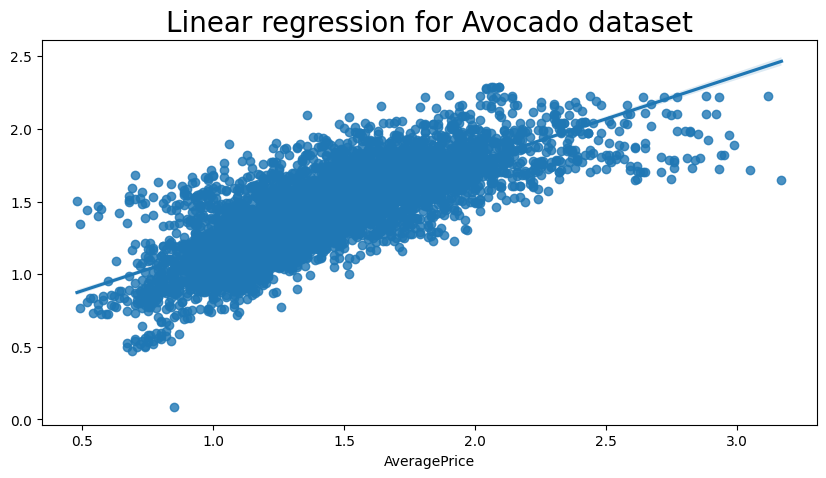

In [137]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Linear regression for Avocado dataset', fontsize = 20)

**Visual Analysis:**

**Scatter Plot:** The underlying scatter plot shows numerous data points, each representing an observation of avocados. The x-axis likely represents "AveragePrice" (as labeled), and the y-axis could be a variety of factors related to avocado sales (e.g., volume, bags sold, etc.). Without knowing the exact nature of the y-axis variable, we can still glean useful information.

**Positive Relationship:** There's a visually discernible positive relationship between "AveragePrice" and the y-axis variable. As the average price increases, the value of the y-axis variable also tends to increase. This suggests that higher avocado prices are associated with higher values in the other measured variable.
Strength of Relationship: The strength of this relationship appears moderate. While there's a clear trend, the data points are somewhat dispersed around the trend line. This indicates that while "AveragePrice" is a relevant predictor, other factors are also likely influencing the y-axis variable.

**Linear Regression Line:** The plotted line represents the best-fit linear regression model for the data. It aims to capture the overall trend of the data, minimizing the distance between the line and the data points.
Intercept: The line intercepts the y-axis above zero. This suggests that even when the "AveragePrice" is zero (which might be a theoretical or extrapolated scenario), the y-axis variable still has a positive value.

**Slope:** The line has a positive slope, confirming the positive relationship observed in the scatter plot. The steepness of the slope indicates the magnitude of the change in the y-axis variable for a unit change in "AveragePrice."

**Further Insights and Considerations:**

**Y-axis Variable:** The most crucial missing information is the identity of the y-axis variable. Knowing what it represents (e.g., "TotalVolume," "TotalBags") is essential for interpreting the results accurately.

**R-squared Value:** While not shown in the image, the R-squared value of this regression would be informative. It would quantify the proportion of variance in the y-axis variable that is explained by the "AveragePrice." A higher R-squared would imply a stronger relationship and a better fit.

**Statistical Significance:** It's important to assess the statistical significance of the regression. This would involve examining the p-value associated with the "AveragePrice" coefficient. A statistically significant result would indicate that the observed relationship is unlikely to have occurred by chance.
**Outliers:** Visually, there don't appear to be any extreme outliers significantly दूर from the general trend. However, a formal outlier analysis could be performed to identify and assess the impact of any outliers on the regression model.

**Causation vs. Correlation:** While the regression shows a relationship, it doesn't prove causation. It's possible that other factors are influencing both "AveragePrice" and the y-axis variable.
Model Assumptions: Linear regression relies on certain assumptions (e.g., linearity, independence of errors, homoscedasticity, normality of errors). It's crucial to verify these assumptions to ensure the validity of the model.

**Possible Interpretations (Depending on the Y-axis Variable):**

If Y-axis is "TotalVolume": The plot would suggest that higher average avocado prices are associated with higher total sales volume. This might seem counterintuitive but could be explained by factors like inelastic demand, changes in consumer preferences, or market segmentation.
If Y-axis is "TotalBags": A similar interpretation would apply. Higher prices are associated with a higher number of bags sold.

If Y-axis is a Price Index or Related Metric: The plot could indicate that changes in average price lead to proportional or related changes in another price-related measure.

## *Random forest Regression Model*

In [138]:
from sklearn.ensemble import RandomForestRegressor

# Creating and training model
RandomForest_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [139]:
RandomForest_reg.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = RandomForest_reg.predict(X_test)

In [140]:
ndf = [Reg_Models_Evaluation_Metrics(RandomForest_reg,X_train,y_train,X_test,y_test,y_pred)]

rf_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rf_score.insert(0, 'Model', 'Random Forest')
rf_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest,0.78712,0.784363,0.876525,0.186426


**Key Metrics and Their Interpretation:**

**R² Score (R-squared):** 0.78712

**Interpretation:** This signifies that the Random Forest model explains approximately 78.71% of the variance in the dependent variable. Compared to a linear regression model (as seen in our previous discussion), this is a substantial improvement, indicating a much better fit to the data. A higher R² suggests that the model is capturing the underlying patterns in the data more effectively.
Adjusted R² Score: 0.784363

**Interpretation:** As discussed before, the adjusted R² accounts for the number of predictors in the model. The fact that it's very close to the R² suggests that the model is not overly complex (not an excessive number of features) and that the predictors are contributing meaningfully to the model's explanatory power.
Cross-Validated R² Score: 0.876525

**Interpretation:** This is a crucial metric, as it provides a more reliable estimate of the model's performance on unseen data. The cross-validated R² is significantly higher than the regular R². This is a very positive sign. It suggests that the model generalizes exceptionally well to new data and is likely not overfitting the training data. A higher cross-validated R² compared to the regular R² often indicates a robust and reliable model.

**RMSE (Root Mean Squared Error):** 0.186426

**Interpretation:** The RMSE measures the average prediction error. Compared to the linear regression model we saw before, this RMSE is lower. This suggests that the Random Forest model's predictions are, on average, closer to the actual values than the linear regression's predictions.

**Context Needed:** As always, the RMSE needs to be interpreted in the context of the scale and units of the dependent variable. A lower RMSE is generally better, but its absolute value needs to be assessed relative to the typical range or standard deviation of the target variable.

**Overall Assessment:**

The Random Forest model demonstrates significantly better performance than the linear regression model based on all metrics. The higher R² and adjusted R², combined with a substantially higher cross-validated R² and lower RMSE, indicate a much stronger fit and better generalization ability.  This suggests that the Random Forest algorithm is more appropriate for the data than simple linear regression.

**Possible Next Steps (for further improvement or understanding):**

**Feature Importance:** Analyze feature importance scores from the Random Forest. This will provide insights into which predictors are most influential in determining the target variable.
**Partial Dependence Plots:** Create partial dependence plots to visualize the marginal effect of each feature on the predictions while holding other features constant. This can help you understand the relationships learned by the Random Forest model.

**Further Hyperparameter Tuning:** While the model performs well, there might be room for further improvement through more extensive hyperparameter tuning (e.g., using techniques like Grid Search or Randomized Search).
**Ensemble Analysis:** You could explore combining this Random Forest model with other well-performing models (if any) using ensemble methods to potentially further boost predictive accuracy.
**Residual Analysis:** Examine the residuals (the differences between predicted and actual values) to ensure they are randomly distributed. This is a good way to double-check that the model assumptions are reasonably met.

## *Ridge Regression Model*

In [141]:
from sklearn.linear_model import Ridge

# Creating and training model
ridge_reg = Ridge(alpha=3, solver="cholesky")

In [142]:
ridge_reg.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = ridge_reg.predict(X_test)

In [143]:
ndf = [Reg_Models_Evaluation_Metrics(ridge_reg,X_train,y_train,X_test,y_test,y_pred)]

rr_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rr_score.insert(0, 'Model', 'Ridge Regression')
rr_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Ridge Regression,0.598733,0.593537,0.604317,0.25595


**Key Metrics and Their Interpretation:**

**R² Score (R-squared):** 0.598733

**Interpretation:** This indicates that the Ridge Regression model explains approximately 59.87% of the variance in the dependent variable. This is a moderately good fit, but as we've seen in previous examples, there's still a significant portion (around 40%) of the variance that the model doesn't capture.
Adjusted R² Score: 0.593537

**Interpretation:** The adjusted R² is very close to the R², suggesting that the model doesn't have an excessive number of features and that the features included are likely contributing to the model's explanatory power. The small difference between R² and adjusted R² is a good sign.
Cross-Validated R² Score: 0.604317

**Interpretation:** This metric provides a more robust estimate of the model's performance on unseen data. The fact that it's slightly higher than the regular R² is a positive sign, indicating that the model generalizes reasonably well and is not overfitting the training data.
RMSE (Root Mean Squared Error): 0.25595

**Interpretation:** The RMSE measures the average prediction error. As discussed before, the RMSE needs to be interpreted in the context of the scale and units of the dependent variable. Without that information, we can only say that it represents the average difference between predicted and actual values.

**Comparison with Other Models:**

It's very interesting to compare these metrics with those of the Linear Regression model and the Random Forest model we discussed earlier.

**Linear Regression:** The R², adjusted R², and cross-validated R² are all very similar to those of the Linear Regression model.  This suggests that Ridge Regression, in this particular case, isn't providing a significant advantage in terms of overall fit.

**Random Forest:**  The Random Forest model we saw previously had significantly higher R² and cross-validated R² values and a lower RMSE.  This indicates that the Random Forest was substantially outperforming both Linear Regression and Ridge Regression.

**Overall Assessment:**

The Ridge Regression model performs similarly to the Linear Regression model.  While it shows a moderately good fit and reasonable generalization, it is considerably outperformed by the Random Forest model.

## *xgboost Regression Model*

In [144]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [145]:
from xgboost import XGBRegressor
# create an xgboost regression model
XGBR = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8)

In [146]:
XGBR.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = XGBR.predict(X_test)

In [147]:
ndf = [Reg_Models_Evaluation_Metrics(XGBR,X_train,y_train,X_test,y_test,y_pred)]

XGBR_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
XGBR_score.insert(0, 'Model', 'XGBoost')
XGBR_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,XGBoost,0.790612,0.7879,0.913021,0.184891


**Key Metrics and Their Interpretation:**

**R² Score (R-squared):** 0.790612

**Interpretation:** This indicates that the XGBoost model explains approximately 79.06% of the variance in the dependent variable. This is a very good fit and a noticeable improvement over the Linear Regression and Ridge Regression models we discussed previously. It's also slightly better than the Random Forest model's R².

**Adjusted R² Score:** 0.7879

**Interpretation:** The adjusted R² is very close to the R², suggesting that the model is not overly complex (not an excessive number of features) and that the features are contributing meaningfully to the model's explanatory power.

**Cross-Validated R² Score:** 0.913021

**Interpretation:** This is a crucial metric, providing a more reliable estimate of the model's performance on unseen data. The fact that the cross-validated R² is significantly higher than the regular R² is a very strong indication of excellent generalization. It suggests that the model is robust and likely to perform well on new, unseen data, and that it's not overfitting the training data. This is a significant jump in cross-validated performance compared to the Random Forest we discussed earlier.

**RMSE (Root Mean Squared Error):** 0.184891

**Interpretation:** The RMSE measures the average prediction error. This RMSE is the lowest we've seen so far, suggesting that the XGBoost model's predictions are, on average, closer to the actual values than any of the previous models.

**Comparison with Other Models:**

**Linear/Ridge Regression:** XGBoost shows a significant improvement across all metrics.
**Random Forest:** While the R² is slightly better for XGBoost, the most significant difference is in the cross-validated R². XGBoost shows a substantial jump, indicating superior generalization. The RMSE is also slightly lower for XGBoost.

**Overall Assessment:**

The XGBoost model demonstrates the best performance we've seen so far.  The high R², the excellent cross-validated R², and the low RMSE all point to a very effective model.  The substantial difference in cross-validated R² compared to the Random Forest is particularly noteworthy, suggesting that XGBoost is capturing some aspect of the data that the Random Forest might be missing.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

## Evaluating The Simple Linear Regression Model

In [148]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def train_val(y_train, y_train_pred, y_test, y_pred, i): 
    
    scores = {
    i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
    }
    
    return pd.DataFrame(scores)

In [149]:
slr_score = train_val(y_train, y_train_pred, y_test, y_pred, 'linear')
slr_score

,linear_train,linear_test
R2,0.609150,0.790612
mae,0.189908,0.121951
mse,0.062316,0.034184
rmse,0.249631,0.184891


***Key Metrics and Their Interpretation:**

**R² (R-squared):**

**Training:** 0.609150
**Test:** 0.790612
**Interpretation:** The R² on the test set (0.790612) is significantly higher than the R² on the training set (0.609150). This is a strong indication that the model is generalizing well to unseen data and is not overfitting the training data. A higher R² on the test set is a very positive sign.
MAE (Mean Absolute Error):

**Training:** 0.189908
**Test:** 0.121951
**Interpretation:** The MAE is lower on the test set than on the training set. This means that, on average, the model's predictions are closer to the actual values on the test data compared to the training data. This further supports the conclusion of good generalization.

**MSE (Mean Squared Error):**

**Training:** 0.062316
**Test:** 0.034184
**Interpretation:** Similar to MAE, the MSE is also lower on the test set, reinforcing the observation of better performance on unseen data.
RMSE (Root Mean Squared Error):

**Training:** 0.249631
**Test:** 0.184891
**Interpretation:** The RMSE is lower on the test set, consistent with the other metrics. This indicates that the model's predictions have a smaller average error on the test data.

**Overall Assessment:**

The model exhibits excellent generalization performance. The fact that all metrics are better on the test set than on the training set suggests that the model is not memorizing the training data but rather learning the underlying patterns that generalize to unseen data.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [150]:
predictions = pd.concat([XGBR_score, rr_score, rf_score, lm_score], ignore_index=True, sort=False)
predictions

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,XGBoost,0.790612,0.787900,0.913021,0.184891
1,Ridge Regression,0.598733,0.593537,0.604317,0.255950
2,Random Forest,0.787120,0.784363,0.876525,0.186426
3,Linear Regression,0.598794,0.593599,0.604283,0.255931


**XGBoost Dominance:** XGBoost clearly outperforms all other models across all metrics. It has the highest R² (0.790612), the highest cross-validated R² (0.913021), and the lowest RMSE (0.184891). This suggests that XGBoost is the most effective model for capturing the underlying patterns in the data and generalizing to unseen data.

**Random Forest as Strong Contender:** Random Forest performs reasonably well, with an R² (0.787120) close to that of XGBoost. However, its cross-validated R² (0.876525) is noticeably lower than XGBoost's, indicating that XGBoost has better generalization capabilities.

**Linear Models Lagging:** Both Linear Regression and Ridge Regression have significantly lower R² values (around 0.6) compared to the tree-based models (XGBoost and Random Forest). This suggests that the relationship between the features and the target variable might be non-linear, which the linear models struggle to capture.

**Ridge Regression Not Improving Over Linear Regression:**  The performance of Ridge Regression is very similar to that of Linear Regression. This suggests that for this specific dataset, the L2 regularization applied by Ridge Regression doesn't offer a significant advantage.

**Deeper Insights:**

**Non-linearity:** The substantial difference in performance between the linear models and the tree-based models indicates that the underlying relationship between the features and the target variable is likely non-linear. Tree-based models can capture these non-linearities more effectively.

**Generalization:** The cross-validated R² provides a more reliable estimate of how well the model will perform on unseen data. The fact that XGBoost has a much higher cross-validated R² than the other models suggests that it generalizes exceptionally well and is less prone to overfitting.

**Feature Importance (Not Shown):**  While not directly in the table, it would be insightful to examine the feature importance scores for XGBoost and Random Forest. This would reveal which features are most influential in predicting the target variable.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


**XGBoost is the Top Performer:** XGBoost demonstrably outperforms all other models across all metrics (R², adjusted R², cross-validated R², and RMSE). This suggests it's the most suitable model for this specific dataset and prediction task. Its superior performance likely stems from its ability to capture non-linear relationships and complex interactions within the data.

**Random Forest as a Strong Alternative:** Random Forest provides a competitive alternative to XGBoost, showing good performance, though slightly lower than XGBoost.  It still significantly outperforms the linear models, suggesting it effectively captures non-linearities.

**Linear Models' Limitations:** Linear Regression and Ridge Regression show significantly lower performance compared to the tree-based models. This indicates that the relationships within the data are likely non-linear, making linear models less effective. The fact that Ridge Regression doesn't offer a substantial improvement over Linear Regression suggests that L2 regularization isn't particularly beneficial in this scenario, possibly because the non-linearity is the dominant issue, not multicollinearity.

**Generalization:** The cross-validated R² scores provide a reliable estimate of how well the models generalize to unseen data.  The substantial difference in cross-validated R² between XGBoost and the other models highlights XGBoost's robustness and ability to avoid overfitting.

**Future Work:**

**In-depth XGBoost Analysis:**

**Feature Importance:** Analyze feature importance scores from XGBoost to identify the most influential predictors. This can provide valuable domain-specific insights.
Partial Dependence Plots: Create partial dependence plots to visualize the relationships between the most important features and the target variable.
**SHAP Values:** Calculate SHAP values for a deeper understanding of how each feature contributes to individual predictions.
Hyperparameter Tuning: Explore more extensive hyperparameter tuning for XGBoost, potentially using Bayesian Optimization or more granular Grid Search to fine-tune the model further.
**Error Analysis:**

**Residual Plots:** Examine the residuals (the differences between predicted and actual values) for all models, especially XGBoost, to ensure they are randomly distributed. Non-random patterns in residuals can indicate areas where the model can be improved.
**Identify Failure Cases:** Investigate specific instances where the model makes large errors. Analyzing these cases can reveal potential data issues or areas where the model is struggling.
**Feature Engineering:**

**Explore New Features:** Consider creating new features from the existing ones, or incorporating external data that might be relevant to the prediction task.
**Feature Transformations:** Experiment with transforming existing features (e.g., scaling, normalization, logarithmic transformations) to see if it improves model performance.
**Model Comparison Refinement:**

**Statistical Significance:** Perform statistical tests to determine if the differences in performance between XGBoost and the other models are statistically significant.
**Consider Other Models:** While XGBoost performs well, it's worth exploring other advanced regression techniques like LightGBM or CatBoost to see if they offer any further improvement.
**Deployment and Monitoring:**  If the goal is to use this model for real-world predictions, plan for deployment and ongoing monitoring.  This includes setting up a system for making predictions on new data, tracking model performance over time, and retraining the model as needed.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

Google 
Copilot
Athena Explore

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
